### INTRODUCTION

Depression is a mental health condition characterized by persistent feelings of sadness, hopelessness, and a lack of interest or pleasure in activities that are normally enjoyable. It's a serious condition that affects a person's thoughts, emotions, and behavior. From the data we have collected, we want to figure out the affecting factors for depression.

This dataset includes comprehensive information at the individual level on a number of lifestyle and personal factors that may be connected to depression and mental health. These variables include a wide range of behavioral, socioeconomic, and demographic traits, giving a comprehensive picture of each person's profile. Numerous genetic, biochemical, and psychological factors might have an impact on depression, a complex mental health illness. Given that the dataset includes markers including a history of mental illness, a family history of depression, and chronic physical illnesses, it is focused on figuring out how these characteristics can link to mental health and depression risk.

## The problem statements we aim to investigate are:
1. Influence of Chronic Medical Conditions from individual’s Mental Health History  
2. Influence of Lifestyle Habits on Sleep Patterns
3. Family History's Role in Mental Health  
4. Influence of Family Dynamics on Mental Health  
5. Alcohol Use as a Coping Mechanism for Depression  



In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Upload the file
df=pd.read_csv("depression_data.csv")
pd.set_option('display.max_columns',None)

# Select a random sample of data (e.g., 5 random rows)
random_sample = df.sample(n=1000, random_state=42)  # Set random_state for reproducibility

# Display the random sample
random_sample.head(10)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
30965,Valerie Porter,28,Married,High School,1,Non-smoker,Active,Unemployed,26410.44,Moderate,Unhealthy,Fair,Yes,Yes,No,No
82429,Julie Nichols,34,Married,Bachelor's Degree,2,Non-smoker,Moderate,Employed,60681.40,Low,Healthy,Poor,No,No,Yes,Yes
14019,Arthur Saunders,22,Single,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,91774.02,Moderate,Unhealthy,Good,No,Yes,Yes,No
69167,Megan Torres,61,Widowed,Master's Degree,0,Non-smoker,Sedentary,Employed,132168.87,High,Unhealthy,Good,No,Yes,Yes,No
39698,Noah Howard,31,Married,Associate Degree,0,Former,Moderate,Employed,48992.19,Moderate,Moderate,Good,No,No,Yes,No
36005,Dillon Martin,36,Married,High School,0,Non-smoker,Moderate,Employed,36963.19,Low,Moderate,Good,No,Yes,No,No
71451,Mark Weiss,31,Married,Bachelor's Degree,0,Former,Moderate,Employed,55442.66,Moderate,Moderate,Fair,No,No,Yes,No
17030,Adam Smith,22,Single,High School,0,Non-smoker,Moderate,Unemployed,23054.52,Low,Moderate,Fair,No,Yes,No,No
66298,Juan Morris,34,Single,Bachelor's Degree,0,Non-smoker,Moderate,Employed,72478.22,Moderate,Healthy,Good,No,Yes,No,Yes
72368,Melissa Campbell,22,Single,High School,0,Non-smoker,Active,Employed,30186.51,Low,Unhealthy,Good,No,No,No,Yes


In [ ]:
random_sample.isna().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [ ]:
random_sample.dtypes

,0
Name,object
Age,int64
Marital Status,object
Education Level,object
Number of Children,int64
Smoking Status,object
Physical Activity Level,object
Employment Status,object
Income,float64
Alcohol Consumption,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

#### VISUALIZATIONS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

## Age, Income (Numerical Variables)
Binned Box Plot:

Group the ages into bins (e.g., 20-30, 30-40) and show the distribution of income in each age group.

<ipython-input-7-67d9369a6ca5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age Group', y='Income', palette='coolwarm')


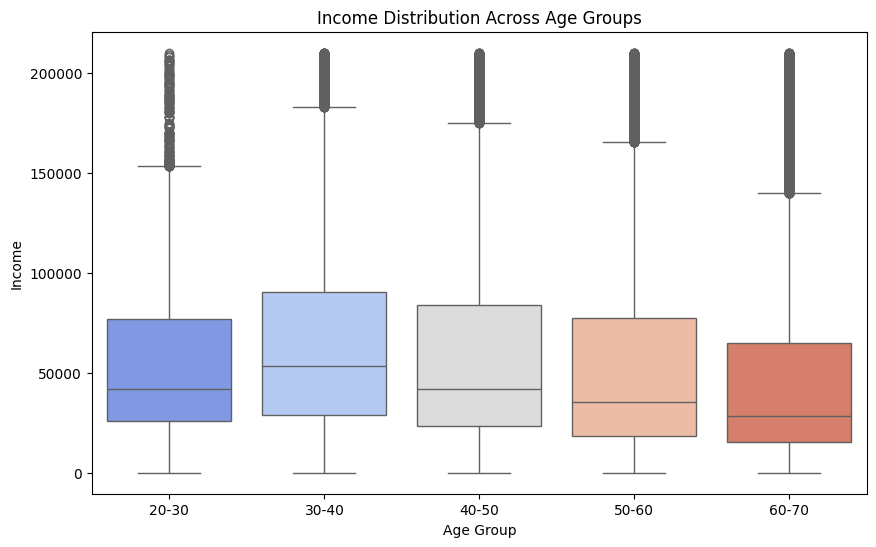

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70], labels=["20-30","30-40","40-50","50-60","60-70"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age Group', y='Income', palette='coolwarm')
plt.title('Income Distribution Across Age Groups')
plt.show()


## Marital Status, Education Level, Smoking Status, Physical Activity Level (Categorical Variables)
Stacked Bar Plot with Multiple Categories:

Show the distribution of chronic medical conditions across different marital statuses or education levels.

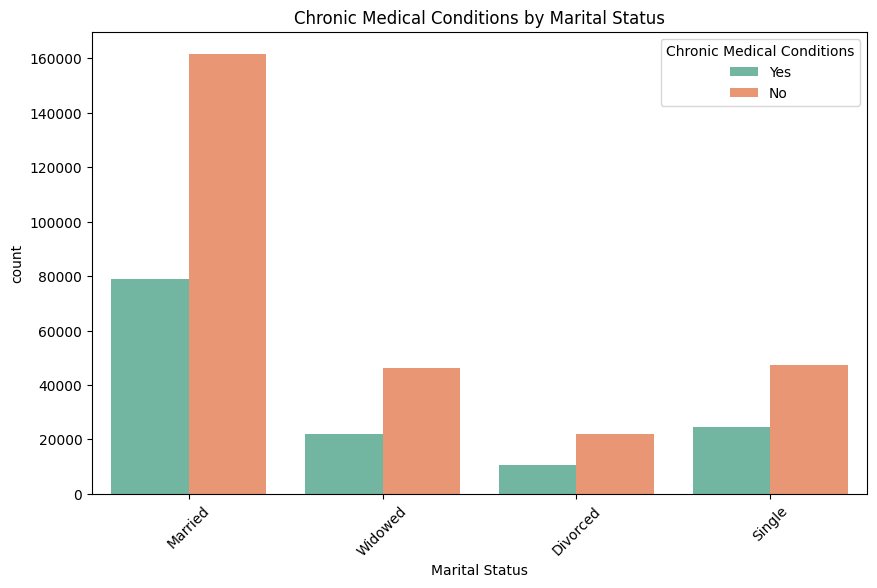

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Marital Status', hue='Chronic Medical Conditions', palette='Set2')
plt.title('Chronic Medical Conditions by Marital Status')
plt.xticks(rotation=45)
plt.show()

## Alcohol Consumption, Dietary Habits, Sleep Patterns (Categorical Variables)
Heatmap of Correlation between Habits:

Use a heatmap to display relationships between habits (alcohol consumption, dietary habits, sleep patterns).

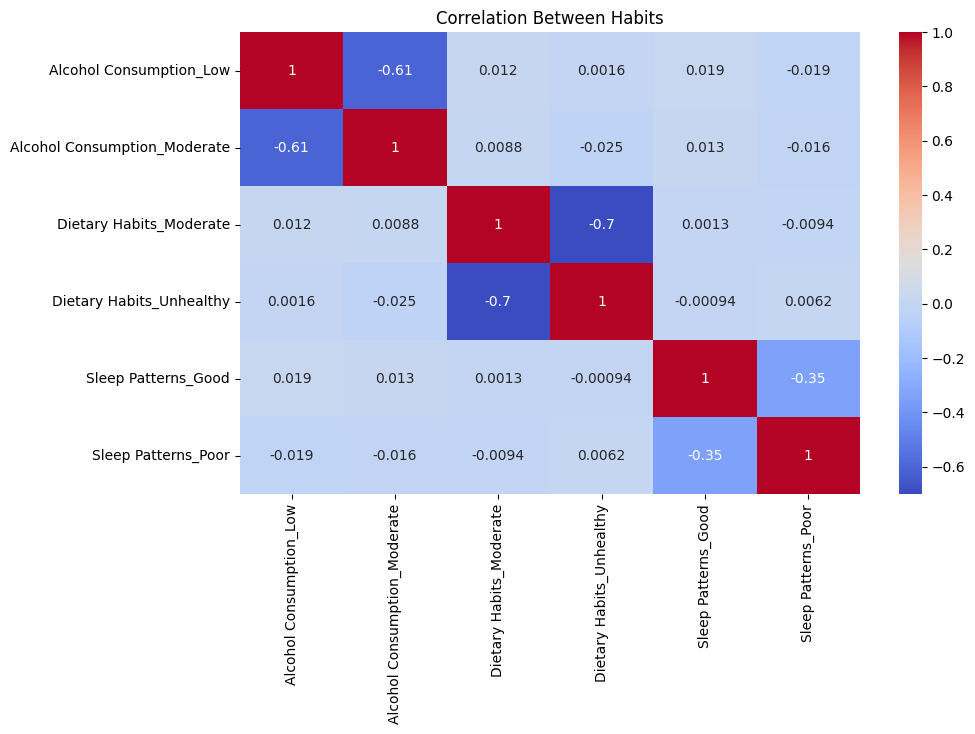

In [ ]:
habits_df = df[['Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']]
habits_encoded = pd.get_dummies(habits_df, drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(habits_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Habits')
plt.show()

## History of Mental Illness, History of Substance Abuse, Family History of Depression
Venn Diagram:

Show the intersection of individuals with a history of mental illness, substance abuse, and family history of depression.

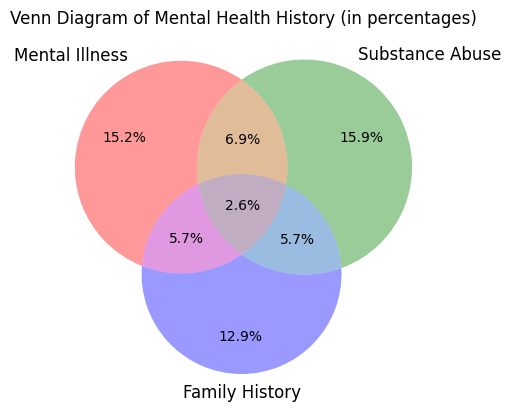

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Assuming 'Yes' represents having the condition, convert it to boolean
total = len(df)  # Total number of individuals

# Create sets based on conditions
mental_illness_set = set(df.index[df['History of Mental Illness'] == 'Yes'])
substance_abuse_set = set(df.index[df['History of Substance Abuse'] == 'Yes'])
family_history_set = set(df.index[df['Family History of Depression'] == 'Yes'])

# Calculate the sizes of the subsets as percentages
venn = venn3([mental_illness_set, substance_abuse_set, family_history_set],
             set_labels=('Mental Illness', 'Substance Abuse', 'Family History'))

# Update the labels to show percentages
venn.get_label_by_id('100').set_text(f"{len(mental_illness_set - substance_abuse_set - family_history_set) / total * 100:.1f}%")
venn.get_label_by_id('010').set_text(f"{len(substance_abuse_set - mental_illness_set - family_history_set) / total * 100:.1f}%")
venn.get_label_by_id('001').set_text(f"{len(family_history_set - mental_illness_set - substance_abuse_set) / total * 100:.1f}%")
venn.get_label_by_id('110').set_text(f"{len(mental_illness_set & substance_abuse_set - family_history_set) / total * 100:.1f}%")
venn.get_label_by_id('101').set_text(f"{len(mental_illness_set & family_history_set - substance_abuse_set) / total * 100:.1f}%")
venn.get_label_by_id('011').set_text(f"{len(substance_abuse_set & family_history_set - mental_illness_set) / total * 100:.1f}%")
venn.get_label_by_id('111').set_text(f"{len(mental_illness_set & substance_abuse_set & family_history_set) / total * 100:.1f}%")

# Title and plot display
plt.title('Venn Diagram of Mental Health History (in percentages)')
plt.show()

### Education level effect on Income

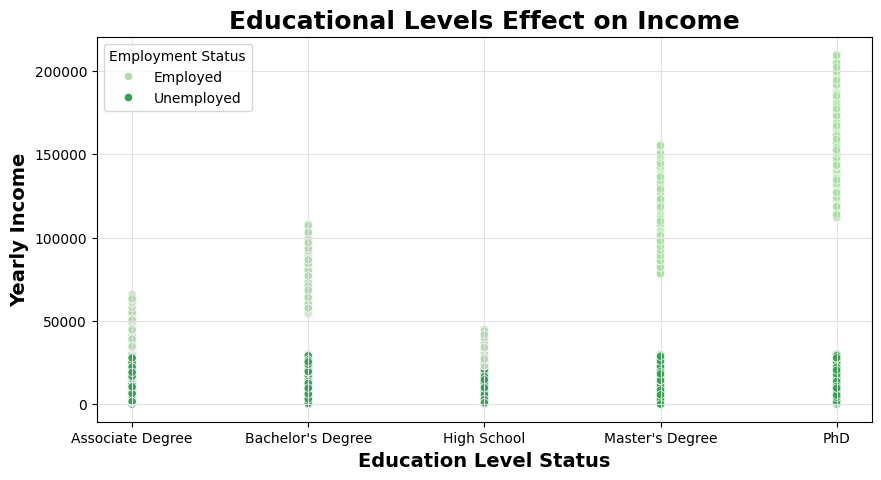

In [ ]:
# Scatterplot for Education Level vs Income with color-coded Employment Status
fig, ax = plt.subplots(figsize=(10, 5))

# Create scatterplot with a green-based color palette for 'Employment Status'
sns.scatterplot(x='Education Level', y='Income', data=df.sort_values(by=['Education Level']), hue='Employment Status', palette='Greens')

# Add title and labels with custom font size and weight
plt.title('Educational Levels Effect on Income', fontsize=18, weight='bold')
plt.xlabel('Education Level Status', fontsize=14, weight='bold')
plt.ylabel('Yearly Income', fontsize=14, weight='bold')

# Customize gridlines with a specific color
plt.grid(color='#e2e2e6')

# Display plot
plt.show()

### Problem Statement 1: Influence of Chronic Medical Conditions from individual’s Mental Health History

Investigate whether an individual's health history can influence the presence of chronic medical conditions. This analysis will focus on the relationship between health indicators and chronic illness development.  
Dependent Variable: Chronic Medical Conditions  
Independent Variables: History of Mental Illness, History of Substance Abuse, Sleep Patterns


<ipython-input-12-b97e71d68b21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sb.countplot(x='Chronic Medical Conditions',data=df, palette=['Green', 'LightGreen'])


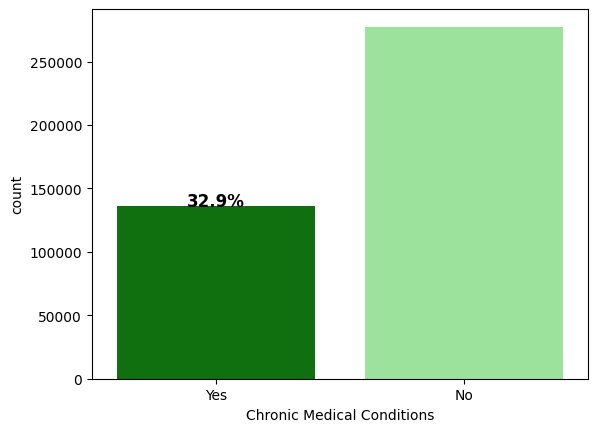

In [ ]:
total = len(df)  # Total number of rows in the dataframe


ax=sb.countplot(x='Chronic Medical Conditions',data=df, palette=['Green', 'LightGreen'])
# Annotate the plot with percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', fontweight='bold')

    plt.show()

In [ ]:
df['Chronic Medical Conditions'].value_counts()

,count
Chronic Medical Conditions,
No,277561
Yes,136207


Problem with logistic regression is that while predicitng the values the prediction may say that all observation are from the majority class(class that dominates) that the class that has very high observations compared to other class(minority class).This problem is called imbalance classification.

To overcomes this we have 2 methods
1. Delete some records from the majority class<br>
Loss of information

2. Duplicate observations from the minority class<br>
This is called oversampling(which we may go with)<br>
--> ALGORITHMS<br>
SMOTE(Synthetic Minority Oversampling techniques)

In [ ]:
# Define function to categorize age
def categorize_age(age):
    if age < 30:
        return 'Young Adults (18-30)'
    elif 30 <= age < 55:
        return 'Adults (30-55)'
    else:
        return 'Senior Citizens (55+)'

# Apply function to create new column
df['Age Group'] = df['Age'].apply(categorize_age)

# Display DataFrame to check new column
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age Group
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,Adults (30-55)
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,Senior Citizens (55+)
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,Senior Citizens (55+)
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,Senior Citizens (55+)
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,Young Adults (18-30)


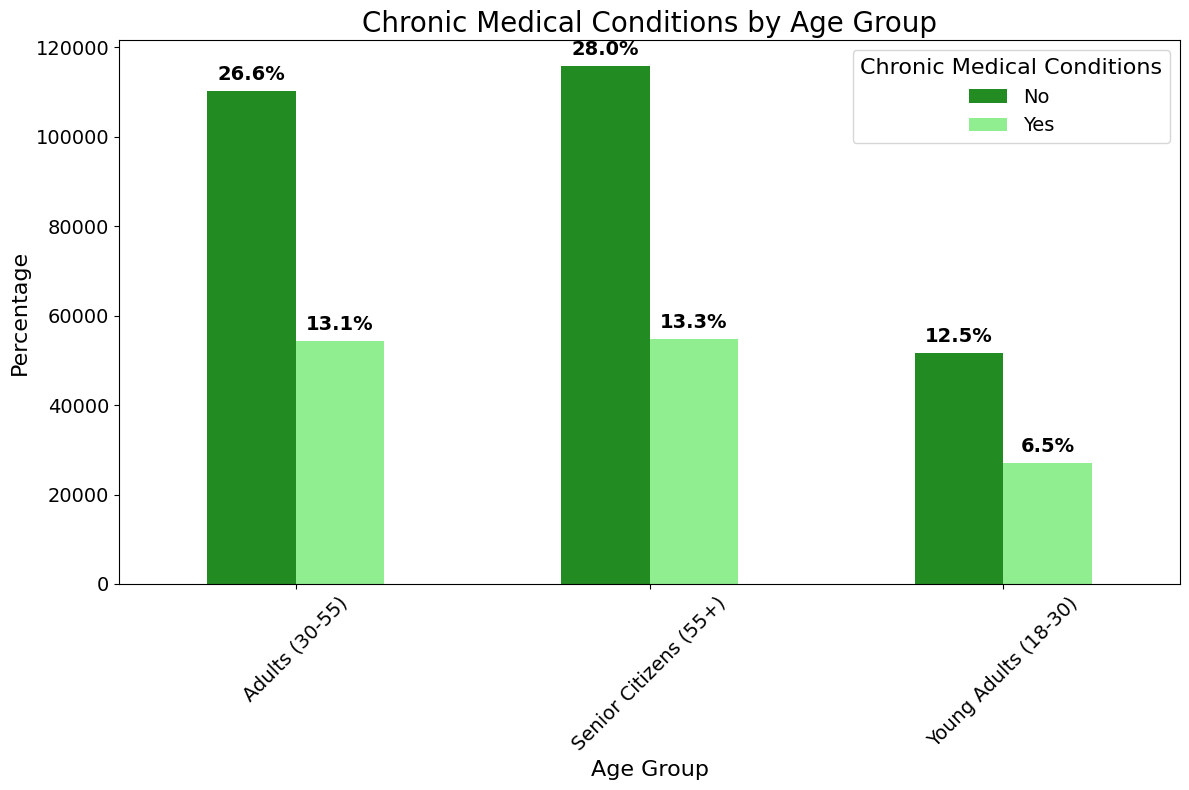

In [ ]:
# Create crosstab to count occurrences
crosstab = pd.crosstab(df['Age Group'], df['Chronic Medical Conditions'])

# Plotting
ax = crosstab.plot(kind='bar', figsize=(12, 8), color=['ForestGreen', 'LightGreen'])

# Total count for all categories
total = sum([bar.get_height() for container in ax.containers for bar in container])

# Adding percentages on top of bars
for container in ax.containers:
    # Annotate each bar with its percentage based on the total count
    for bar in container:
        height = bar.get_height()
        percentage = f'{(height / total * 100):.1f}%'  # Calculate percentage of the entire data
        ax.annotate(percentage,
                    (bar.get_x() + bar.get_width() / 2, height),  # x, y position
                    ha='center', va='bottom',  # Horizontal and vertical alignment
                    xytext=(0, 5),  # Vertical offset
                    textcoords='offset points',
                    fontsize=14, color='black', fontweight='bold')  # Font styling

# Adjusting font sizes for title, labels, and ticks
plt.title('Chronic Medical Conditions by Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Chronic Medical Conditions', fontsize=14, title_fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
count_yes = len(df[df['Chronic Medical Conditions']=='Yes'])
count_no = len(df[df['Chronic Medical Conditions']=='No'])
pct_of_yes = count_yes/(count_yes+count_no)
print("Percentage of people with chronic condition:", round(pct_of_yes*100,3))
pct_of_no = count_no/(count_yes+count_no)
print("Percentage of without chronic condition:", round(pct_of_no*100,3))

Percentage of people with chronic condition: 32.919
Percentage of without chronic condition: 67.081


In [ ]:
pd.crosstab(df['Chronic Medical Conditions'],df['History of Substance Abuse'])

History of Substance Abuse,No,Yes
Chronic Medical Conditions,,
No,191399,86162
Yes,93481,42726


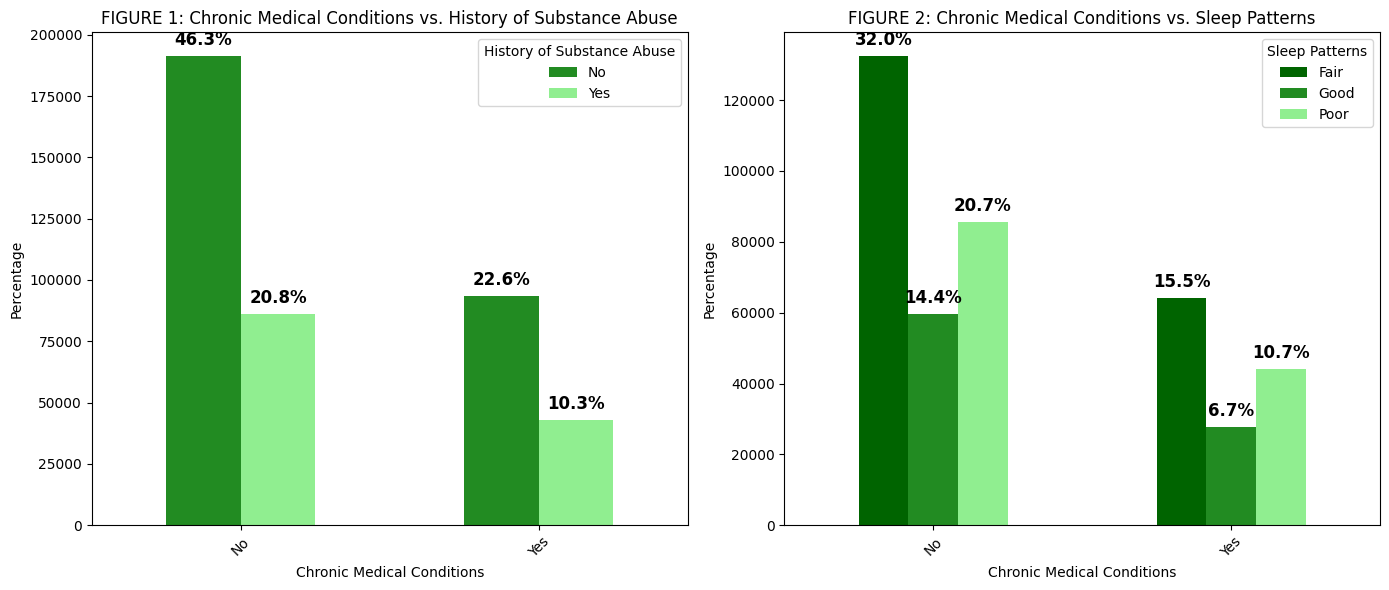

In [ ]:
# Create crosstab for each comparison
crosstab_substance_abuse = pd.crosstab(df['Chronic Medical Conditions'], df['History of Substance Abuse'])
crosstab_depression = pd.crosstab(df['Chronic Medical Conditions'], df['Sleep Patterns'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total for both subplots to calculate percentages
total_substance_abuse = crosstab_substance_abuse.values.sum()
total_depression = crosstab_depression.values.sum()

# Plot for History of Substance Abuse with specified color
crosstab_substance_abuse.plot(kind='bar', ax=axes[0], color=['ForestGreen', 'LightGreen'])  # Blue and Orange
axes[0].set_title('FIGURE 1: Chronic Medical Conditions vs. History of Substance Abuse')
axes[0].set_xlabel('Chronic Medical Conditions')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='History of Substance Abuse')
axes[0].tick_params(axis='x', rotation=45)

# Add percentage labels on top of bars for the first plot
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{(height / total_substance_abuse * 100):.1f}%'
        axes[0].annotate(percentage,
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', xytext=(0, 5),
                         textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Plot for Sleep Patterns with specified color
crosstab_depression.plot(kind='bar', ax=axes[1], color=['DarkGreen', 'ForestGreen', 'LightGreen'])  # Green, Red, Yellow
axes[1].set_title('FIGURE 2: Chronic Medical Conditions vs. Sleep Patterns')
axes[1].set_xlabel('Chronic Medical Conditions')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Sleep Patterns')
axes[1].tick_params(axis='x', rotation=45)

# Add percentage labels on top of bars for the second plot
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{(height / total_depression * 100):.1f}%'
        axes[1].annotate(percentage,
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', xytext=(0, 5),
                         textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Chronic Medical Conditions'] = label_encoder.fit_transform(df['Chronic Medical Conditions'])
df['Sleep Patterns'] = label_encoder.fit_transform(df['Sleep Patterns'])
df['History of Mental Illness'] = label_encoder.fit_transform(df['History of Mental Illness'])
df['History of Substance Abuse'] = label_encoder.fit_transform(df['History of Substance Abuse'])

# Define features and target variables for both models
X = df[['Chronic Medical Conditions', 'Sleep Patterns', 'History of Mental Illness']]
y_depression = df['History of Substance Abuse']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_depression, test_size=0.3, random_state=0)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[85378     0]
 [38753     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82     85378
           1       0.00      0.00      0.00     38753

    accuracy                           0.69    124131
   macro avg       0.34      0.50      0.41    124131
weighted avg       0.47      0.69      0.56    124131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Assuming df is your DataFrame

# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['Chronic Medical Conditions'] = label_encoder.fit_transform(df['Chronic Medical Conditions'])
df['Sleep Patterns'] = label_encoder.fit_transform(df['Sleep Patterns'])
df['History of Mental Illness'] = label_encoder.fit_transform(df['History of Mental Illness'])
df['History of Substance Abuse'] = label_encoder.fit_transform(df['History of Substance Abuse'])

# Define the independent variables (X) and the target variable (y)
X = df[['Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse']]
y = df['Chronic Medical Conditions']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for the intercept in statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.633492
         Iterations 4
                               Logit Regression Results                               
Dep. Variable:     Chronic Medical Conditions   No. Observations:               331014
Model:                                  Logit   Df Residuals:                   331010
Method:                                   MLE   Df Model:                            3
Date:                        Thu, 10 Oct 2024   Pseudo R-squ.:               0.0001573
Time:                                20:50:01   Log-Likelihood:            -2.0969e+05
converged:                               True   LL-Null:                   -2.0973e+05
Covariance Type:                    nonrobust   LLR p-value:                 3.069e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const       

## Logistic Regression Model

The general form of the logistic regression equation is:

$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \beta_3 \cdot X_3 + \ldots
$

### Given Coefficients

- **Intercept (\(\beta_0\))**: -0.7491
- **Coefficient for Sleep Patterns (\(\beta_1\))**: 0.0300
- **Coefficient for History of Mental Illness (\(\beta_2\))**: 0.0291
- **Coefficient for History of Substance Abuse (\(\beta_3\))**: 0.0100 (not statistically significant)

### Logistic Regression Equation

Inserting these values into the logistic regression equation, we get:

The logistic regression equation can be expressed as:

$
\log\left(\frac{p}{1-p}\right) = β_0 + β_1 \cdot (\text{Sleep Patterns}) + β_2 \cdot (\text{History of Mental Illness}) + β_3 \cdot (\text{History of Substance Abuse})
$

Where:
- **β0** = -0.7491 (Intercept)
- **β1** = 0.0300 (Coefficient for Sleep Patterns)
- **β2** = 0.0291 (Coefficient for History of Mental Illness)
- **β3** = 0.0100 (Coefficient for History of Substance Abuse)

## Probability of Chronic Medical Conditions

To calculate the probability \(p\), we can rearrange the equation:

$
p = \frac{e^{\beta_0 + \beta_1 \cdot (\text{Sleep Patterns}) + \beta_2 \cdot (\text{History of Mental Illness}) + \beta_3 \cdot (\text{History of Substance Abuse})}}{1 + e^{\beta_0 + \beta_1 \cdot (\text{Sleep Patterns}) + \beta_2 \cdot (\text{History of Mental Illness}) + \beta_3 \cdot (\text{History of Substance Abuse})}}
$


### Interpretation

- **Sleep Patterns**: A unit increase in the Sleep Patterns variable is associated with a 3.00% increase in the log-odds of having chronic medical conditions.
- **History of Mental Illness**: A unit increase in this variable is associated with a 2.91% increase in the log-odds of having chronic medical conditions.
- **History of Substance Abuse**: This variable's coefficient suggests a positive association, but it is not statistically significant (p-value = 0.212), indicating that it might not be a reliable predictor in this model.


### Problem Statement 2: Influence of Lifestyle Habits on Sleep Patterns
Analyze how lifestyle factors such as smoking, physical activity, alcohol consumption, and dietary habits impact sleep patterns. The aim is to identify which behaviors most significantly influence sleep quality.  

Dependent Variable: Sleep Patterns

Independent Variables: Smoking Status, Physical Activity Level, Alcohol Consumption, Dietary Habits


In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("depression_data.csv")
pd.set_option('display.max_columns',None)
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 47.13%
Model Coefficients: [[ 0.00625724  0.07253943 -0.06389974 -0.02334894]
 [ 0.01095374 -0.02513621 -0.00134238  0.01113892]
 [-0.01721099 -0.04740321  0.06524213  0.01221002]]
Intercept: [-0.39529071  0.41218435 -0.01689364]
Optimization terminated successfully.
         Current function value: 1.044107
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:         Sleep Patterns   No. Observations:               413768
Model:                        MNLogit   Df Residuals:                   413758
Method:                           MLE   Df Model:                            8
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                0.001301
Time:                        20:51:13   Log-Likelihood:            -4.3202e+05
converged:                       True   LL-Null:                   -4.3258e+05
Covariance Type:            nonrobust   LLR p-value:                1.339e-237
       Sleep Patterns=1   

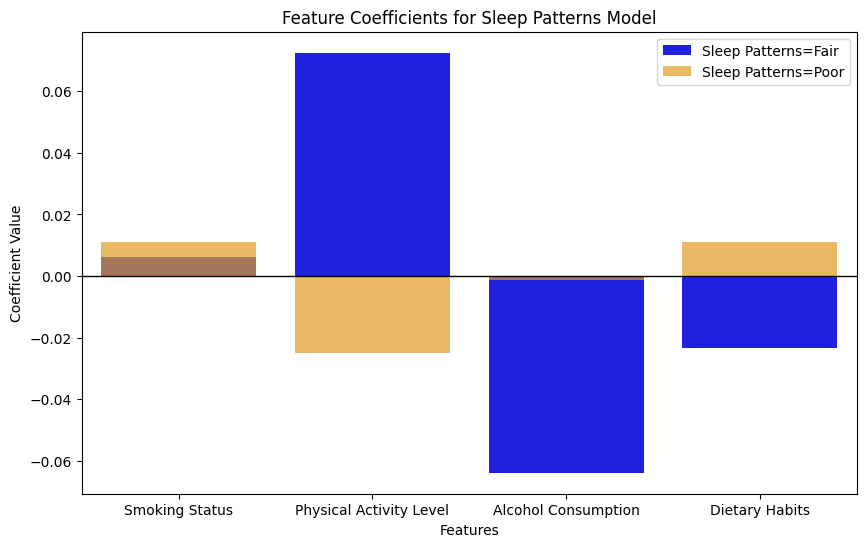

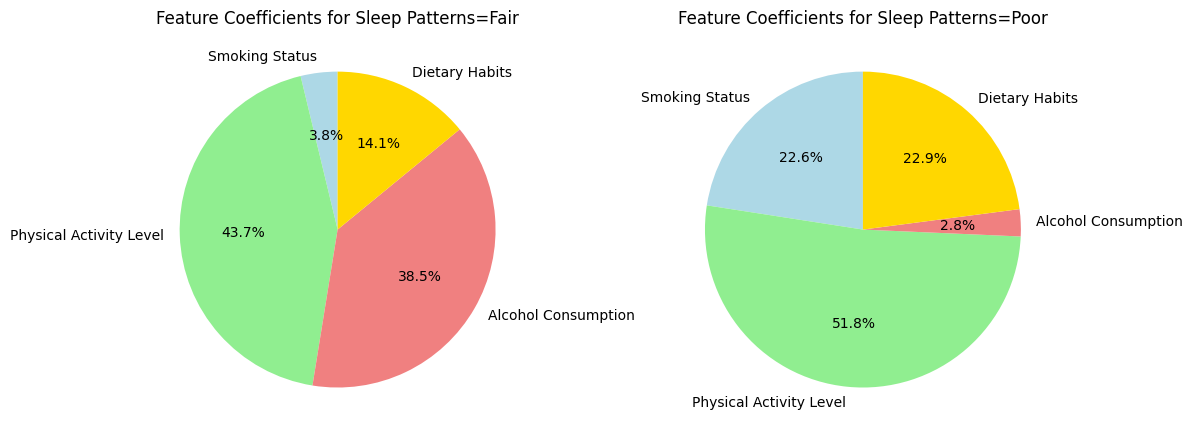

In [ ]:
df_q2=pd.read_csv("depression_data.csv")

# For Smoking Status, you can map them to numerical values (Former=0, Current=1, Non-smoker=2)
df_q2['Smoking Status'] = df_q2['Smoking Status'].map({'Former': 0, 'Current': 1, 'Non-smoker': 2})

# For Physical Activity Level, you can map them to numerical values (Sedentary=0, Moderate=1, Active=2)
df_q2['Physical Activity Level'] = df_q2['Physical Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})

# For Alcohol Consumption, you can map them to numerical values (Low=0, Moderate=1, High=2)
df_q2['Alcohol Consumption'] = df_q2['Alcohol Consumption'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# For Dietary Habits, you can map them to numerical values (Unhealthy=0, Moderate=1, Healthy=2)
df_q2['Dietary Habits'] = df_q2['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})

# For sleep patterns, you can map them to numerical values (Good=0, Fair=1, Poor=2 for instance)
df_q2['Sleep Patterns'] = df_q2['Sleep Patterns'].map({'Good': 0, 'Fair': 1, 'Poor': 2})

# Define the independent variables (X) and the dependent variable (Y)
X = df_q2[['Smoking Status', 'Physical Activity Level', 'Alcohol Consumption', 'Dietary Habits']]
y = df_q2['Sleep Patterns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#store values of the coefficient and intercept
coefficients = model.coef_
intercepts = model.intercept_

# Display the model coefficients to understand the influence of each variable
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create a multinomial logistic regression model using statsmodels
model = sm.MNLogit(y, X)

# Fit the model
result = model.fit()

# Print the summary of the model, including coefficients, p-values, etc.
print(result.summary())

# Visualization of the coefficients

# Get model coefficients and intercept
print("Model Coefficients:", coefficients)
print("Intercept:", intercepts)

# Features and Sleep Patterns categories
features = ['Smoking Status', 'Physical Activity Level', 'Alcohol Consumption', 'Dietary Habits']
categories = ['Fair', 'Poor']  # For Sleep Patterns=1 (Fair) and Sleep Patterns=2 (Poor)

# Create subplots for visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot coefficients for Sleep Patterns=1 (Fair)
sns.barplot(x=features, y=coefficients[0], color="blue", label='Sleep Patterns=Fair', ax=ax)

# Plot coefficients for Sleep Patterns=2 (Poor)
sns.barplot(x=features, y=coefficients[1], color="orange", label='Sleep Patterns=Poor', ax=ax, alpha=0.7)

# Add horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=1)

# Add title, labels, and legend
plt.title('Feature Coefficients for Sleep Patterns Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.legend()

# Display the plot
plt.show()

# Take absolute values of the coefficients for visual representation (since pie charts show magnitude)
coefficients_abs = np.abs(coefficients)

# Create subplots for pie chart visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Sleep Patterns=1 (Fair)
ax[0].pie(coefficients_abs[0], labels=features, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'], startangle=90)
ax[0].set_title('Feature Coefficients for Sleep Patterns=Fair')

# Pie chart for Sleep Patterns=2 (Poor)
ax[1].pie(coefficients_abs[1], labels=features, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'], startangle=90)
ax[1].set_title('Feature Coefficients for Sleep Patterns=Poor')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

Dependent Variable (Outcome):

Sleep Patterns (Good, Fair, Poor)

Independent Variables (Lifestyle Habits):

Smoking Status (Non-smoker, Former smoker, Smoker)

Physical Activity Level (Sedentary, Moderate, Active)

Alcohol Consumption (Low, Moderate, High)

Dietary Habits (Healthy, Moderate, Unhealthy)

Solution Approach:

Model the Relationship: Use a logistic regression model to assess how lifestyle habits affect sleep patterns.

If sleep patterns are ordered (Good > Fair > Poor), you can use Ordinal Logistic Regression.

If sleep patterns are treated as categories with no inherent order, you can use Multinomial Logistic Regression.

Visualize the Differences: Plot graphs to compare the distribution of sleep patterns among different groups (e.g., smokers vs. non-smokers).

<h4>Sleep Patterns = 1 (Fair Sleep):</h4>

    - Intercept: 0.7988 means, without considering any independent variables, the likelihood of being in Sleep Pattern 1(Fair Sleep) is significantly positive.

    - Smoking Status: 0.0048 (not statistically significant, p = 0.303). Smoking status does not significantly affect the likelihood of falling into Sleep Pattern 1(Fair Sleep).

    - Physical Activity Level: -0.0967 (significant, p < 0.001). For every unit increase in physical activity level, the odds of falling into Sleep Pattern 1(Fair Sleep) decrease (negative coefficient).

    - Alcohol Consumption: 0.0641 (significant, p < 0.001). For every unit increase in alcohol consumption, the odds of falling into Sleep Pattern 1(Fair Sleep) increase.

    - Dietary Habits: 0.0338 (significant, p < 0.001). For every unit improvement in dietary habits, the odds of falling into Sleep Pattern 1(Fair Sleep) increase.


<h4>Sleep Patterns = 2(Poor Sleep):</h4>

    - Intercept: 0.3721 means the likelihood of being in Sleep Pattern 2(Poor Sleep) is also positive but lower than Sleep Pattern 1.

    - Smoking Status: -0.0251 (significant, p < 0.001). For every unit increase in smoking status, the odds of falling into Sleep Pattern 2(Poor Sleep) decrease.

    - Physical Activity Level: -0.1217 (significant, p < 0.001). Like Sleep Pattern 1(Fair Sleep), higher physical activity decreases the likelihood of being in Sleep Pattern 2(Poor Sleep).

    - Alcohol Consumption: 0.1342 (significant, p < 0.001). Increased alcohol consumption makes it more likely to fall into Sleep Pattern 2(Poor Sleep).

    - Dietary Habits: 0.0364 (significant, p < 0.001). Similar to Sleep Pattern 1, better dietary habits increase the likelihood of being in Sleep Pattern 2(Poor Sleep).


<h4>Conclusion:</h4>

The model suggests:

1. Physical activity consistently reduces the likelihood of falling into either Fair or Poor, suggesting it may be associated with healthier or baseline sleep patterns.

2. Alcohol consumption increases the likelihood of being in both Fair and Poor, implying a negative association with healthy sleep patterns.

3. Dietary habits show a positive effect on both Fair and Poor, indicating that better diet may slightly increase the odds of falling into these categories.

4. Smoking status has a slight negative effect on Poor but is insignificant for Fair.

### Problem Statement 3: Family History's Role in Mental Health  
Investigate how a family history of depression influences mental health outcomes, focusing on the prevalence of mental illness among individuals with and without a family history of depression.  

Dependent Variables: History of Mental Illness

Independent Variable: Family History of Depression


Accuracy: 69.45%
Model Coefficients: [[0.01095559 0.00280083]]
Intercept: [-0.97019185]
Optimization terminated successfully.
         Current function value: 0.613987
         Iterations 5
                              MNLogit Regression Results                             
Dep. Variable:     History of Mental Illness   No. Observations:               413768
Model:                               MNLogit   Df Residuals:                   413765
Method:                                  MLE   Df Model:                            2
Date:                       Thu, 10 Oct 2024   Pseudo R-squ.:               0.0005001
Time:                               20:51:46   Log-Likelihood:            -2.5405e+05
converged:                              True   LL-Null:                   -2.5418e+05
Covariance Type:                   nonrobust   LLR p-value:                 6.250e-56
 History of Mental Illness=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

<ipython-input-25-c8d90ec6985c>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_probabilities = df_q3.groupby(['Family History of Depression', 'Age Binned'])['History of Mental Illness'].mean().reset_index()


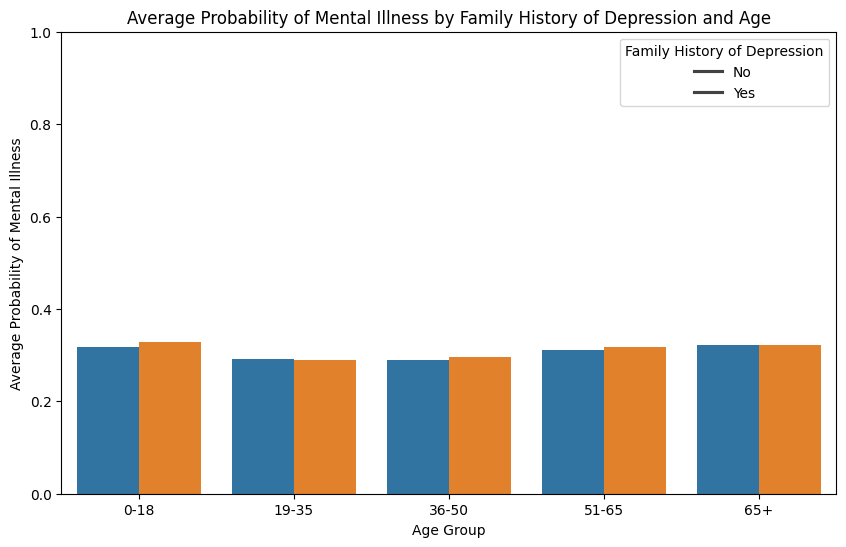

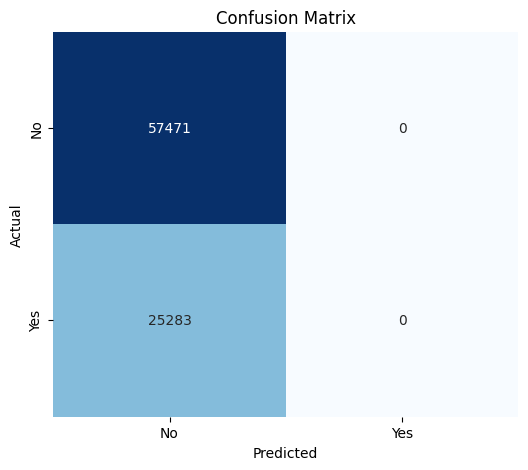

In [ ]:
# Load dataset
df_q3 = pd.read_csv("depression_data.csv")

# Map categorical variables to numerical values
df_q3['History of Mental Illness'] = df_q3['History of Mental Illness'].map({'Yes': 1, 'No': 0})
df_q3['Family History of Depression'] = df_q3['Family History of Depression'].map({'Yes': 1, 'No': 0})

# Define the independent variables (X) and the dependent variable (Y)
X = df_q3[['Family History of Depression', 'Age']]
y = df_q3['History of Mental Illness']

# Add a constant term for the intercept for statsmodels
X_const = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the model coefficients to understand the influence of each variable
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Create a multinomial logistic regression model using statsmodels
model = sm.MNLogit(y, X_const)

# Fit the model
result = model.fit()

# Print the summary of the model, including coefficients, p-values, etc.
print(result.summary())

# Visualization 1: Bar Plot for Average Probability of Mental Illness by Family History and Age
# Binning 'Age' for clearer visualization (optional)
df_q3['Age Binned'] = pd.cut(df_q3['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Group by 'Family History of Depression' and 'Age Binned' and calculate the mean probability
avg_probabilities = df_q3.groupby(['Family History of Depression', 'Age Binned'])['History of Mental Illness'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Binned', y='History of Mental Illness', hue='Family History of Depression', data=avg_probabilities)
plt.title('Average Probability of Mental Illness by Family History of Depression and Age')
plt.ylabel('Average Probability of Mental Illness')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.legend(title='Family History of Depression', labels=['No', 'Yes'])
plt.show()

# Visualization 2: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. Accuracy: 69.45%
   
This value represents the model's accuracy, meaning it correctly predicted the presence or absence of mental illness in 69.45% of the cases from the test dataset. While this accuracy is not exceedingly high, it provides a baseline performance level for the model.

2. Model Coefficients: [[0.01095559 0.00280083]]

The coefficients indicate the influence of each independent variable on the likelihood of mental illness:

Family History of Depression (0.01095559): A positive coefficient means that if a person has a family history of depression, the likelihood of mental illness slightly increases. However, this effect is small.
Age (0.00280083): This coefficient is also positive, suggesting that as age increases, so does the likelihood of mental illness, though the effect size is minimal.
3. Intercept: [-0.97019185]
The intercept is the baseline value when all independent variables are zero. Here, the intercept is negative, suggesting that without accounting for age and family history, there is a lower baseline probability of having a history of mental illness.

MNLogit Regression Results:
The Multinomial Logistic Regression was used to calculate the log-odds of experiencing mental illness, based on the independent variables.

Key Metrics:
Pseudo R-squared: 0.0005001: This value is very low, indicating that the model explains only a tiny fraction of the variance in mental illness. This suggests that Family History of Depression and Age alone are not strong predictors of mental illness.

Log-Likelihood: -254,050: A measure of how well the model fits the data. While there's no single threshold, higher (less negative) log-likelihood values indicate a better fit.

LL-Null: -254,180: The log-likelihood of a model with no predictors. The improvement in log-likelihood between this value and the fitted model’s value is slight, which further supports the idea that the chosen predictors only explain a small part of the variance.

Interpretation of the Regression Table:

1. Constant (Intercept): -0.9748
The negative intercept means that if both predictors (family history and age) are 0, the model predicts a lower baseline likelihood of having mental illness.
2. Family History of Depression: 0.0111
Coefficient: This is the log-odds increase in the likelihood of mental illness for people with a family history of depression. However, the p-value (0.148) indicates that this effect is not statistically significant, as it exceeds the typical significance threshold (p < 0.05). Thus, the influence of family history on mental illness is weak in this model.
3. Age: 0.0029
Coefficient: The positive coefficient suggests that as age increases, so do the odds of having a history of mental illness. The p-value (0.000) is highly significant, indicating that age is a statistically significant predictor of mental illness in this dataset.
Z-Score (15.627): The high z-score for age indicates a strong effect size, reinforcing the finding that age is a significant predictor of mental illness.

Summary:

Family History of Depression: While the coefficient is positive, suggesting that family history increases the odds of mental illness, the effect is weak and not statistically significant.

Age: This is a significant predictor, with older individuals being slightly more likely to have a history of mental illness.

Model Fit: The model has a relatively low accuracy of 69.45%, and the pseudo R-squared suggests that the model explains very little of the variance in mental illness, meaning that other factors beyond family history and age may be stronger predictors.

This analysis suggests that age plays a more significant role than family history in predicting mental illness, but overall, the model has limitations in fully capturing the complexity of mental illness predictors.

### Problem Statement 4: Influence of Family Dynamics on Mental Health  
Explore how family dynamics, specifically marital status and the number of children, influence mental health outcomes. The goal is to analyze the individual and combined impact of these factors on mental well-being.

Dependent Variables: History of Mental Illness

Independent Variables: Marital Status, Number of Children


In [ ]:
df=pd.read_csv("depression_data.csv")
pd.set_option('display.max_columns',None)

# Step 1: Data Preprocessing
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert 'History of Mental Illness' to binary (1 for Yes, 0 for No)
df['History of Mental Illness'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Convert categorical variables into dummy variables for 'Marital Status'
df = pd.get_dummies(df, columns=['Marital Status'], drop_first=True)

# Step 2: Define dependent and independent variables
# Independent variables: 'Number of Children' and dummy variables for 'Marital Status'
X = df[['Number of Children', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed']]
y = df['History of Mental Illness']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Fit the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[86319     0]
 [37812     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86319
           1       0.00      0.00      0.00     37812

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import statsmodels.api as sm

# Convert X to numerical using one-hot encoding
X_sm = pd.get_dummies(X_sm, columns=X_sm.select_dtypes(include=['object', 'category']).columns, drop_first=True)
X_sm = X_sm.astype(float) # Ensure all columns are numeric


# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

# Step 5: Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.555818
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     Alcohol_Consumption_Binary   No. Observations:               413768
Model:                                  Logit   Df Residuals:                   413763
Method:                                   MLE   Df Model:                            4
Date:                        Thu, 10 Oct 2024   Pseudo R-squ.:               0.0002755
Time:                                21:10:01   Log-Likelihood:            -2.2998e+05
converged:                               True   LL-Null:                   -2.3004e+05
Covariance Type:                    nonrobust   LLR p-value:                 1.921e-26
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const               

### Logistic Regression Model for History of Mental Illness
We removed the marital status of divorced people due to high multicollinearity
The logistic regression equation can be expressed as:

log(𝑝1−𝑝)=𝛽0+𝛽1⋅(Number of Children)+𝛽2⋅(Marital Status_Married)+𝛽3⋅(Marital Status_Single)+𝛽4⋅(Marital Status_Widowed)

Where:

β0 = -0.8746 (Intercept)
β1 = -0.0014 (Coefficient for Number of Children)
β2 = 0.0523 (Coefficient for Marital Status_Married)
β3 = 0.0132 (Coefficient for Marital Status_Single)
β4 = 0.0948 (Coefficient for Marital Status_Widowed)
Probability of History of Mental Illness
To calculate the probability (p), we can rearrange the equation:

𝑝=𝑒𝛽0+𝛽1⋅(Number of Children)+𝛽2⋅(Marital Status_Married)+𝛽3⋅(Marital Status_Single)+𝛽4⋅(Marital Status_Widowed)1+𝑒𝛽0+𝛽1⋅(Number of Children)+𝛽2⋅(Marital Status_Married)+𝛽3⋅(Marital Status_Single)+𝛽4⋅(Marital Status_Widowed)

Interpretation
Number of Children: A unit increase in the number of children is associated with a decrease of 0.14% in the log-odds of having a history of mental illness, but this effect is not statistically significant (p-value = 0.663).
Marital Status_Married: Being married is associated with a 5.23% increase in the log-odds of having a history of mental illness, which is statistically significant (p-value < 0.001).
Marital Status_Single: Being single is associated with a 1.32% increase in the log-odds of having a history of mental illness, but this effect is not statistically significant (p-value = 0.388).
Marital Status_Widowed: Being widowed is associated with a 9.48% increase in the log-odds of having a history of mental illness, which is statistically significant (p-value < 0.001).

### Problem Statement 5: Alcohol Use as a Coping Mechanism for Depression  
Investigate the use of alcohol as a coping mechanism among individuals with reported depression. The analysis will also explore whether these individuals report a personal history of mental illness.  

Dependent Variable: Alcohol Consumption  

Independent Variables: History of Mental Illness


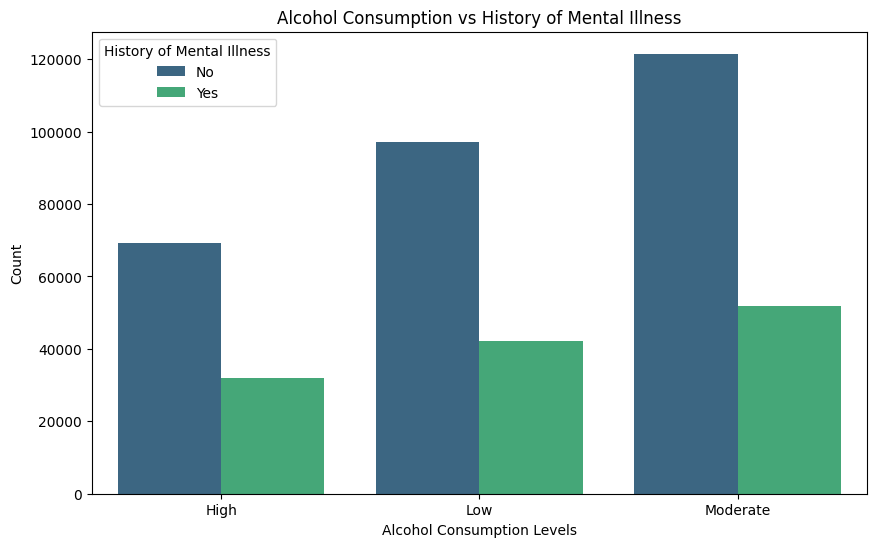

F_onewayResult(statistic=63.85438670691028, pvalue=1.3430441378667303e-15)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Load the dataset
file_path = 'depression_data.csv'
data = pd.read_csv(file_path)
data.head()

# Clean data - ensure relevant columns are in the correct format
data_clean = data[['Alcohol Consumption', 'History of Mental Illness']].dropna()
data_clean['Alcohol Consumption'] = data_clean['Alcohol Consumption'].astype('category')
data_clean['History of Mental Illness'] = data_clean['History of Mental Illness'].astype('category')

# Visualizing the relationship between Alcohol Consumption and History of Mental Illness
plt.figure(figsize=(10,6))
sns.countplot(x='Alcohol Consumption', hue='History of Mental Illness', data=data_clean, palette='viridis')
plt.title('Alcohol Consumption vs History of Mental Illness')
plt.xlabel('Alcohol Consumption Levels')
plt.ylabel('Count')
plt.legend(title='History of Mental Illness')
plt.show()

# Conducting ANOVA
# Perform ANOVA to compare means across the levels of Alcohol Consumption based on mental illness
anova_result = stats.f_oneway(
    data_clean[data_clean['History of Mental Illness'] == 'Yes']['Alcohol Consumption'].cat.codes,
    data_clean[data_clean['History of Mental Illness'] == 'No']['Alcohol Consumption'].cat.codes
)

# Display ANOVA result
anova_result

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Clean data - ensure relevant columns are in the correct format
data_clean = data[['Alcohol Consumption', 'History of Mental Illness']].dropna()
data_clean['Alcohol Consumption'] = data_clean['Alcohol Consumption'].astype('category')
data_clean['History of Mental Illness'] = data_clean['History of Mental Illness'].astype('category')

# Rename column to remove spaces
data_clean = data_clean.rename(columns={'History of Mental Illness': 'History_of_Mental_Illness'})

# Convert Alcohol Consumption to numeric codes (required for ANOVA)
data_clean['Alcohol_Consumption_Codes'] = data_clean['Alcohol Consumption'].cat.codes

# Create the ANOVA model (now using the renamed column)
model = ols('Alcohol_Consumption_Codes ~ C(History_of_Mental_Illness)', data=data_clean).fit()

# Perform ANOVA and get the table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                                    sum_sq        df          F        PR(>F)
C(History_of_Mental_Illness)      40.40573       1.0  63.854387  1.343044e-15
Residual                      261822.53384  413766.0        NaN           NaN


To perform a logistic regression analysis between alcohol consumption and history of mental illness, we can use the Logit function from the statsmodels library. Logistic regression is appropriate here if you're predicting a binary outcome, so we'll assume the alcohol consumption levels are converted into a binary form (e.g., high vs. low/moderate). If your dataset has more than two categories, you can either:

Perform multinomial logistic regression, or
Combine categories into a binary format.
Here, I'll assume that the goal is to predict history of mental illness (binary: Yes/No) based on alcohol consumption.

Steps:
Convert Alcohol Consumption into binary categories (for example, "High" vs "Low/Moderate").
Perform logistic regression to predict History of Mental Illness based on Alcohol Consumption.
Logistic Regression Code

In [ ]:
# Clean data - ensure relevant columns are in the correct format
data_clean = data[['Alcohol Consumption', 'History of Mental Illness']].dropna()
data_clean['Alcohol Consumption'] = data_clean['Alcohol Consumption'].astype('category')
data_clean['History of Mental Illness'] = data_clean['History of Mental Illness'].astype('category')

# Rename column to remove spaces for easier formula use
data_clean = data_clean.rename(columns={'History of Mental Illness': 'History_of_Mental_Illness'})

# Convert Alcohol Consumption into binary (High vs. Low/Moderate)
data_clean['Alcohol_Consumption_Binary'] = data_clean['Alcohol Consumption'].apply(lambda x: 1 if x == 'High' else 0)

# Logistic regression model
X = sm.add_constant(data_clean['Alcohol_Consumption_Binary'])  # Add constant (intercept)
y = data_clean['History_of_Mental_Illness'].cat.codes  # Convert Yes/No to binary

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Summary of the logistic regression
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.614205
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               413768
Model:                          Logit   Df Residuals:                   413766
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:               0.0001457
Time:                        20:54:20   Log-Likelihood:            -2.5414e+05
converged:                       True   LL-Null:                   -2.5418e+05
Covariance Type:            nonrobust   LLR p-value:                 7.548e-18
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8445      0.004   -216.525      0.000      

Explanation:

Data Preparation:
Alcohol Consumption is converted to a binary variable (1 for "High", 0 for "Low" or "Moderate").
History of Mental Illness is also converted to a binary code (1 for "Yes", 0 for "No").

Logistic Regression:
The logistic regression model (Logit) is fit using Alcohol Consumption as the independent variable and History of Mental Illness as the dependent variable.

Result:

The logistic regression summary will display coefficients, p-values, and other statistics.
This model will help you understand whether individuals who report high alcohol consumption are more likely to have a history of mental illness.

In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head()


# Check the unique values in the relevant columns for our logistic regression
data['Alcohol Consumption'].unique(), data['History of Mental Illness'].unique(), data['Family History of Depression'].unique()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert categorical variables to numeric
data['Alcohol_Consumption_Binary'] = data['Alcohol Consumption'].apply(lambda x: 1 if x == 'High' else 0)
data['History_of_Mental_Illness_Binary'] = data['History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Family_History_of_Alcoholism_Binary'] = data['Family History of Depression'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select independent (X) and dependent (y) variables
X = data[['History_of_Mental_Illness_Binary', 'Family_History_of_Alcoholism_Binary']]
y = data['Alcohol_Consumption_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Generate a classification report to evaluate the model
report = classification_report(y_test, y_pred)

# Display the classification report
report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86     93729\n           1       0.00      0.00      0.00     30402\n\n    accuracy                           0.76    124131\n   macro avg       0.38      0.50      0.43    124131\nweighted avg       0.57      0.76      0.65    124131\n'

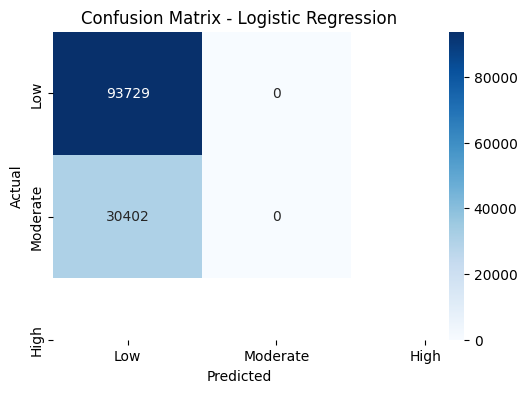

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86     93729
           1       0.00      0.00      0.00     30402

    accuracy                           0.76    124131
   macro avg       0.38      0.50      0.43    124131
weighted avg       0.57      0.76      0.65    124131



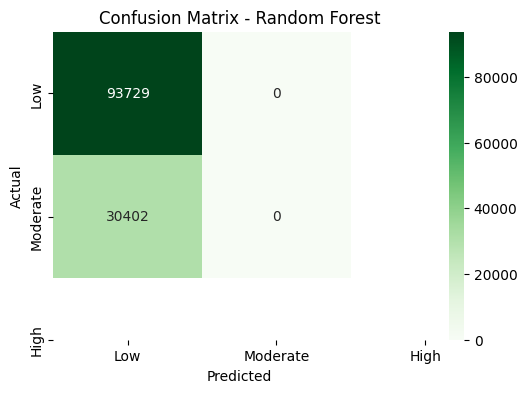

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     93729
           1       0.00      0.00      0.00     30402

    accuracy                           0.76    124131
   macro avg       0.38      0.50      0.43    124131
weighted avg       0.57      0.76      0.65    124131

History_of_Mental_Illness_Binary: 0.8932513159467764
Family_History_of_Alcoholism_Binary: 0.1067486840532236


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data has been preprocessed and ready for modeling:
# X - Independent Variables: ['History of Mental Illness Encoded', 'Family History of Alcoholism Encoded']
# y - Dependent Variable: 'Alcohol Consumption Encoded'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Logistic Regression Model ###
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Logistic Regression Predictions
y_pred_logreg = logreg.predict(X_test)

# Confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression Classification Report
logreg_report = classification_report(y_test, y_pred_logreg)
print(logreg_report)

### 2. Random Forest Classifier Model ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classification Report
rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

Class distribution after SMOTE:
Alcohol_Consumption_Binary
0    312690
1    312690
Name: count, dtype: int64


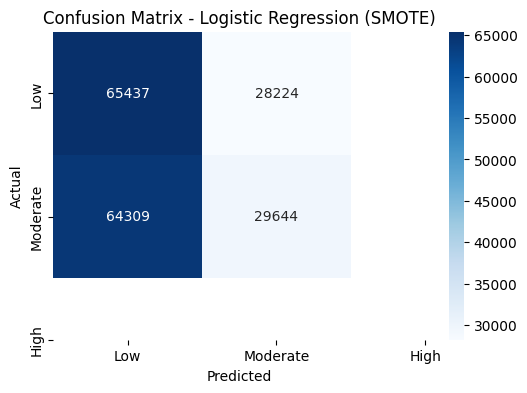

              precision    recall  f1-score   support

           0       0.50      0.70      0.59     93661
           1       0.51      0.32      0.39     93953

    accuracy                           0.51    187614
   macro avg       0.51      0.51      0.49    187614
weighted avg       0.51      0.51      0.49    187614



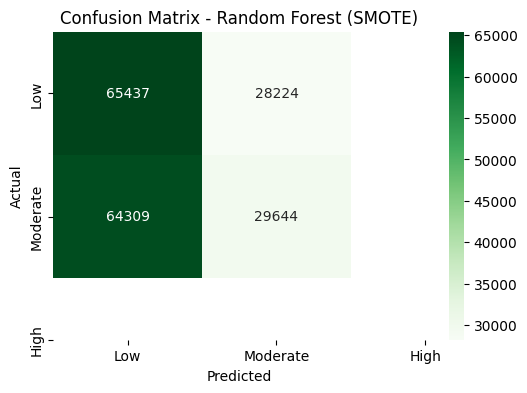

              precision    recall  f1-score   support

           0       0.50      0.70      0.59     93661
           1       0.51      0.32      0.39     93953

    accuracy                           0.51    187614
   macro avg       0.51      0.51      0.49    187614
weighted avg       0.51      0.51      0.49    187614

History_of_Mental_Illness_Binary: 0.9088480074779661
Family_History_of_Alcoholism_Binary: 0.09115199252203389


In [ ]:
# Importing SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming the data has been preprocessed
# X - Independent Variables: ['History of Mental Illness Encoded', 'Family History of Alcoholism Encoded']
# y - Dependent Variable: 'Alcohol Consumption Encoded'

# Apply SMOTE to the dataset to handle imbalances
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_smote.value_counts())

# Split the SMOTE-adjusted data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

### 1. Logistic Regression Model with SMOTE ###
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Logistic Regression Predictions
y_pred_logreg = logreg.predict(X_test)

# Confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression Classification Report with SMOTE
logreg_report = classification_report(y_test, y_pred_logreg)
print(logreg_report)

### 2. Random Forest Classifier Model with SMOTE ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classification Report with SMOTE
rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

# Feature Importance for Random Forest with SMOTE
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')


In [ ]:
# After fitting the logistic regression model
intercept = logreg.intercept_
coefficients = logreg.coef_

# Independent variable names (X.columns)
feature_names = X.columns

# Display the logistic regression equation
print("Logistic Regression Equation:")
print(f"Intercept (β0): {intercept[0]}")
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"Coefficient for {feature} (β): {coef}")

Logistic Regression Equation:
Intercept (β0): -0.027602688775050736
Coefficient for History_of_Mental_Illness_Binary (β): 0.0675917963394042
Coefficient for Family_History_of_Alcoholism_Binary (β): 0.020407923734384905


The output will give you the intercept and the coefficients of the independent variables, which you can plug into the logistic regression equation:

log ⁡ ( 𝑃 ( 𝑌 ) 1 − 𝑃 ( 𝑌 ) ) = 𝛽 0 + 𝛽 1 ⋅ History of Mental Illness + 𝛽 2 ⋅ Family History of Alcoholism log( 1−P(Y) P(Y)​)=β 0​+β 1​⋅History of Mental Illness+β 2​⋅Family History of Alcoholism Where:

𝑃 ( 𝑌 ) P(Y) is the probability of a specific alcohol consumption level (e.g., High consumption). 𝛽 0 β 0​is the intercept. 𝛽 1 β 1​is the coefficient for "History of Mental Illness". 𝛽 2 β 2​is the coefficient for "Family History of Alcoholism".

In [ ]:
# After fitting the logistic regression model
intercept = logreg.intercept_   # Intercept (β0)
coefficients = logreg.coef_     # Coefficients (β1, β2, ... βn)

# Independent variable names (X.columns)
feature_names = X.columns

# Display the logistic regression equation
print("Logistic Regression Equation:")
print(f"Intercept (β0): {intercept[0]}")
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"Coefficient for {feature} (β): {coef}")

Logistic Regression Equation:
Intercept (β0): -0.027602688775050736
Coefficient for History_of_Mental_Illness_Binary (β): 0.0675917963394042
Coefficient for Family_History_of_Alcoholism_Binary (β): 0.020407923734384905


Here’s how you can extract and display the feature importance for the Random Forest model in Python, in markdown code format.

In [ ]:
# After fitting the random forest model
feature_importances = rf_model.feature_importances_   # Feature importances from Random Forest

# Independent variable names (X.columns)
feature_names = X.columns

# Display the feature importance from the Random Forest model
print("Random Forest Feature Importance:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

Random Forest Feature Importance:
History_of_Mental_Illness_Binary: 0.9088480074779661
Family_History_of_Alcoholism_Binary: 0.09115199252203389


Logistic Regression Equation: Once you run the code, it will output the logistic regression equation in the following form:

log ⁡ ( 𝑃 ( 𝑌 ) 1 − 𝑃 ( 𝑌 ) ) = 𝛽 0 + 𝛽 1 ⋅ 𝑋 1 + 𝛽 2 ⋅ 𝑋 2 + . . . + 𝛽 𝑛 ⋅ 𝑋 𝑛 log( 1−P(Y) P(Y)​)=β 0​+β 1​⋅X 1​+β 2​⋅X 2​+...+β n​⋅X n​

Where:

𝑃 ( 𝑌 ) P(Y) is the probability of a specific alcohol consumption level (e.g., High consumption). 𝛽 0 β 0​is the intercept. 𝛽 1 , 𝛽 2 , . . . , 𝛽 𝑛 β 1​,β 2​,...,β n​are the coefficients for the independent variables (e.g., History of Mental Illness, Family History of Alcoholism). 𝑋 1 , 𝑋 2 , . . . , 𝑋 𝑛 X 1​,X 2​,...,X n​are the independent variables.